# **Import Necessary Libraries**

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


# **Load the Dataset**

In [5]:
# URL to fetch the dataset
DATA_SOURCE_URL = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data"
# Link to the Breast Cancer Wisconsin (Original) dataset: https://archive.ics.uci.edu/dataset/15/breast+cancer+wisconsin+original

# Defining the feature names for the dataset based on the PDF description
COLUMN_HEADERS = [
    "SampleCodeNumber",           # Unique identifier for each sample (id number)
    "ClumpThickness",             # Clump thickness (1 - 10)
    "CellSizeUniformity",         # Uniformity of cell size (1 - 10)
    "CellShapeUniformity",        # Uniformity of cell shape (1 - 10)
    "MarginalAdhesion",           # Marginal adhesion (1 - 10)
    "SingleEpithelialCellSize",   # Size of single epithelial cell (1 - 10)
    "BareNuclei",                 # Bare nuclei (1 - 10)
    "BlandChromatin",             # Bland chromatin (1 - 10)
    "NormalNucleoli",             # Normal nucleoli (1 - 10)
    "Mitoses",                    # Mitoses (1 - 10)
    "Diagnosis"                   # Class label (2 for benign, 4 for malignant)
]

# Load the dataset directly from the specified URL
dataset = pd.read_csv(DATA_SOURCE_URL, header=None, names=COLUMN_HEADERS)

# Display the first few rows of the dataset to get a preview
print("Dataset Preview:")
display(dataset.head())

Dataset Preview:


,SampleCodeNumber,ClumpThickness,CellSizeUniformity,CellShapeUniformity,MarginalAdhesion,SingleEpithelialCellSize,BareNuclei,BlandChromatin,NormalNucleoli,Mitoses,Diagnosis
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


# **Data Preprocessing**

In [6]:
dataset.shape

(699, 11)

In [7]:
# Before running this code again make sure to reload the dataset :)

# Step 1: Replace '?' with NaN
dataset = dataset.apply(pd.to_numeric, errors='coerce')

# Step 2: Remove rows with missing values (after converting invalid entries to NaN)
rows_before = dataset.shape[0]
dataset = dataset.dropna()

# Step 3: Remove the "SampleCodeNumber" column
dataset = dataset.drop(columns=["SampleCodeNumber"])

# Step 4: Replace the "Diagnosis" values (2 for benign, 4 for malignant) with 0's and 1's
dataset["Diagnosis"] = dataset["Diagnosis"].apply(lambda x: 0 if x == 2 else 1)

# Step 5: Calculate the number of rows removed
rows_after = dataset.shape[0]
rows_removed = rows_before - rows_after

# Display the number of new rows and rows removed
print(f"Rows removed: {rows_removed}")
print(f"Rows remaining: {rows_after}")

# Display the first few rows of the cleaned dataset
dataset.head()




Rows removed: 16
Rows remaining: 683


,ClumpThickness,CellSizeUniformity,CellShapeUniformity,MarginalAdhesion,SingleEpithelialCellSize,BareNuclei,BlandChromatin,NormalNucleoli,Mitoses,Diagnosis
0,5,1,1,1,2,1.0,3,1,1,0
1,5,4,4,5,7,10.0,3,2,1,0
2,3,1,1,1,2,2.0,3,1,1,0
3,6,8,8,1,3,4.0,3,7,1,0
4,4,1,1,3,2,1.0,3,1,1,0



Diagnosis Summary:
Benign (0): 444
Malignant (1): 239


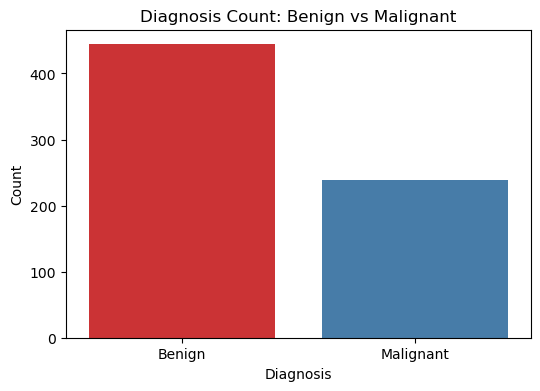

In [8]:
# Count the occurrences of benign (0) and malignant (1)
diagnosis_counts = dataset["Diagnosis"].value_counts()

# Display the count with labels for clarity
print("\nDiagnosis Summary:")
print(f"Benign (0): {diagnosis_counts.get(0, 0)}")
print(f"Malignant (1): {diagnosis_counts.get(1, 0)}")

# Visualization: Plot the counts
plt.figure(figsize=(6, 4))
sns.barplot(x=diagnosis_counts.index, y=diagnosis_counts.values, palette="Set1")
plt.title("Diagnosis Count: Benign vs Malignant")
plt.xlabel("Diagnosis")
plt.ylabel("Count")
plt.xticks(ticks=[0, 1], labels=["Benign", "Malignant"])
plt.show()


In [9]:
# Extract the target variable 'Diagnosis' and assign it to y
y = dataset["Diagnosis"]  # Target: 'Diagnosis' (0 for benign, 1 for malignant)

# Select all other columns as features and assign them to X
X = dataset.loc[:, dataset.columns != "Diagnosis"]  # Features: all columns except 'Diagnosis'

# Display the first few rows of the features and target
print("Features (X):")
display(X.head())  # Show the first few rows of features

print("\nTarget (y):")
display(y.head())  # Show the first few rows of the target variable


Features (X):


,ClumpThickness,CellSizeUniformity,CellShapeUniformity,MarginalAdhesion,SingleEpithelialCellSize,BareNuclei,BlandChromatin,NormalNucleoli,Mitoses
0,5,1,1,1,2,1.0,3,1,1
1,5,4,4,5,7,10.0,3,2,1
2,3,1,1,1,2,2.0,3,1,1
3,6,8,8,1,3,4.0,3,7,1
4,4,1,1,3,2,1.0,3,1,1



Target (y):


0    0
1    0
2    0
3    0
4    0
Name: Diagnosis, dtype: int64

# **Step 1: Split the data into training and testing sets (70% training, 30% testing)**

In [10]:
# Split the dataset into 70% training and 30% testing with stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Display the shape of the resulting datasets
print(f"Training Set: {X_train.shape[0]} samples")
print(f"Testing Set: {X_test.shape[0]} samples")

# Check the ratio of the split
train_ratio = X_train.shape[0] / X.shape[0]
test_ratio = X_test.shape[0] / X.shape[0]

print(f"Training Set ratio: {train_ratio:.2f}")
print(f"Testing Set ratio: {test_ratio:.2f}")


Training Set: 478 samples
Testing Set: 205 samples
Training Set ratio: 0.70
Testing Set ratio: 0.30


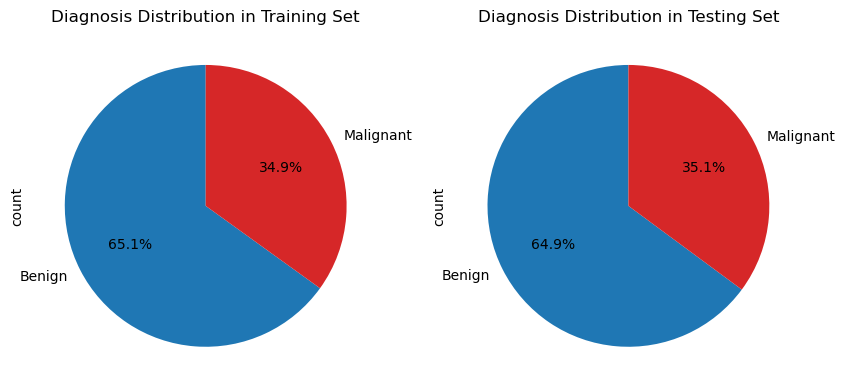

Training Set - Benign (0): 311
Training Set - Malignant (1): 167
Testing Set - Benign (0): 133
Testing Set - Malignant (1): 72


In [11]:
# Visualize the distribution of diagnosis in both training and testing sets
plt.figure(figsize=(10, 6))

# Count of benign (0) and malignant (1) in training set
plt.subplot(1, 2, 1)
diagnosis_train_counts = y_train.value_counts()
diagnosis_train_counts.plot(kind='pie', labels=["Benign", "Malignant"], colors=['#1f77b4', '#d62728'], autopct='%1.1f%%', startangle=90)
plt.title("Diagnosis Distribution in Training Set")

# Count of benign (0) and malignant (1) in testing set
plt.subplot(1, 2, 2)
diagnosis_test_counts = y_test.value_counts()
diagnosis_test_counts.plot(kind='pie', labels=["Benign", "Malignant"], colors=['#1f77b4', '#d62728'], autopct='%1.1f%%', startangle=90)
plt.title("Diagnosis Distribution in Testing Set")

plt.show()

# Print the counts for training and testing sets
print(f"Training Set - Benign (0): {diagnosis_train_counts.get(0, 0)}")
print(f"Training Set - Malignant (1): {diagnosis_train_counts.get(1, 0)}")

print(f"Testing Set - Benign (0): {diagnosis_test_counts.get(0, 0)}")
print(f"Testing Set - Malignant (1): {diagnosis_test_counts.get(1, 0)}")


**Note:**
The percentages shown in the pie chart (65% Benign and 35% Malignant) represent the class distribution of the dataset, not the 70/30 split of training and testing samples. The 70/30 split refers to the proportion of samples allocated to the training and testing sets, while the pie chart shows the proportion of classes (Benign vs. Malignant) in each set.  
  
Due to stratification, the class distribution (the percentage of Benign and Malignant cases) is preserved in both the training and testing sets, which is why you see the same distribution (around 65% Benign and 35% Malignant) in both the training and testing datasets. However, the 70% training set and 30% testing set allocation refers to the number of samples being split, not the class balance.

# **Step 2: Build the pipeline with StandardScaler and Logistic Regression**

In [12]:
# Build the pipeline with StandardScaler and Logistic Regression
pipeline = Pipeline([
    ('scaler', StandardScaler()),          # Standardize the features
    ('logreg', LogisticRegression())       # Apply Logistic Regression
])

# Train the model using the pipeline
pipeline.fit(X_train, y_train)

# Output a message confirming the model has been trained
print("Model has been trained using the pipeline.")

Model has been trained using the pipeline.


# **Step 3: Calculate the training and testing accuracy**

Training Accuracy: 97.70%
Testing Accuracy: 96.10%


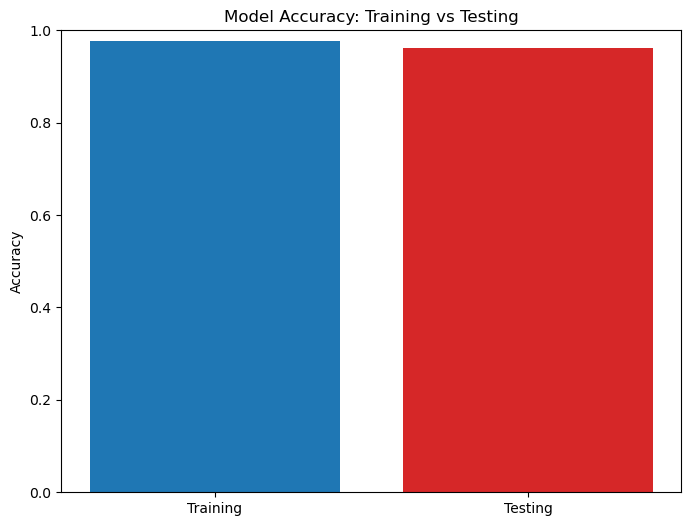

In [13]:
# Model training accuracy
train_accuracy = pipeline.score(X_train, y_train)

# Model testing accuracy
test_accuracy = pipeline.score(X_test, y_test)

# Display the training and testing accuracy
print(f"Training Accuracy: {train_accuracy * 100:.2f}%")
print(f"Testing Accuracy: {test_accuracy * 100:.2f}%")

# Plotting the training and testing accuracy as a bar chart
accuracies = [train_accuracy, test_accuracy]
labels = ['Training', 'Testing']

plt.figure(figsize=(8, 6))
plt.bar(labels, accuracies, color=['#1f77b4', '#d62728'])
plt.title('Model Accuracy: Training vs Testing')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.show()


# **Step 4: Display feature importance**

In [14]:
# Extracting the logistic regression model from the pipeline
logreg = pipeline.named_steps['logreg']

# Get the feature importance (coefficients)
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': np.abs(logreg.coef_[0])  # Absolute value of coefficients as importance
}).sort_values(by='Importance', ascending=False)

# Display the feature importance
print("\nFeature Importance (sorted):")
display(feature_importance)


Feature Importance (sorted):


,Feature,Importance
5,BareNuclei,1.849199
0,ClumpThickness,1.198459
8,Mitoses,0.889682
2,CellShapeUniformity,0.877177
1,CellSizeUniformity,0.736751
3,MarginalAdhesion,0.676237
7,NormalNucleoli,0.494755
6,BlandChromatin,0.440015
4,SingleEpithelialCellSize,0.382828


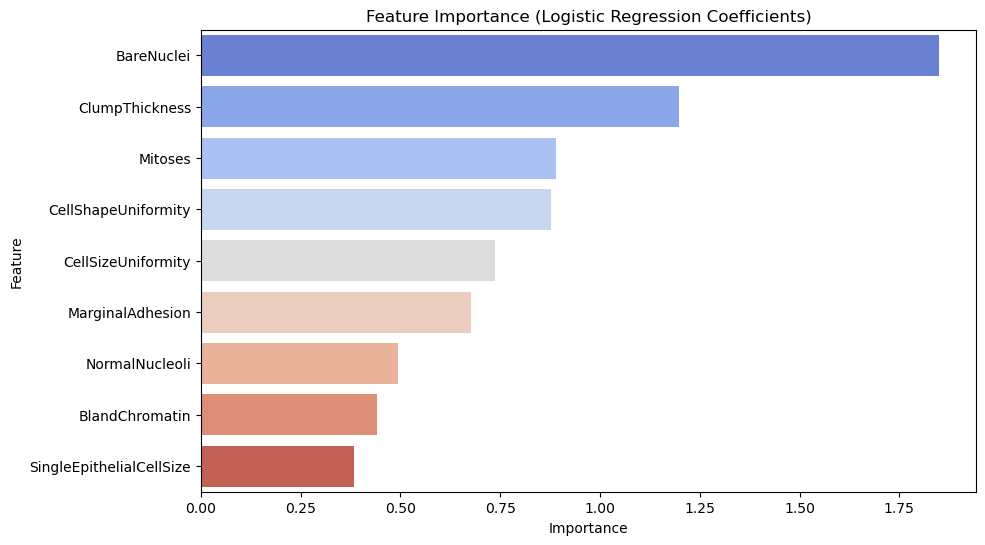

In [15]:
# Bar plot for feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance, palette="coolwarm")
plt.title("Feature Importance (Logistic Regression Coefficients)")
plt.show()

# **Step 5: Generate the confusion matrix and calculate additional metrics**

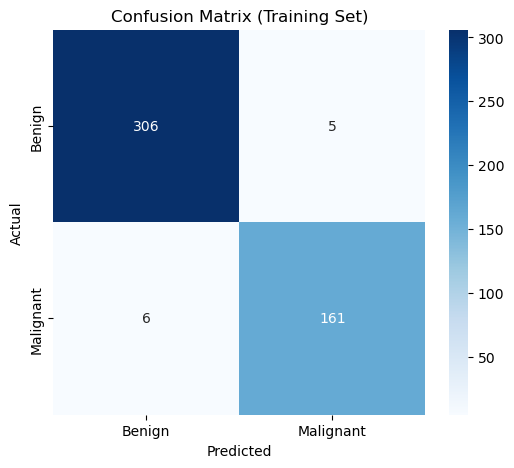

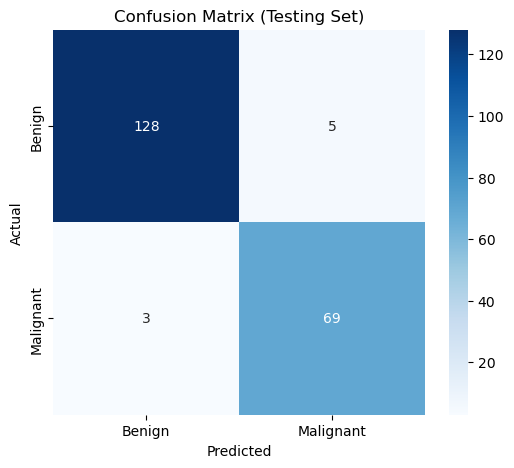

False Alarm Rate (FAR): 0.04

Classification Report:

              precision    recall  f1-score   support

      Benign       0.98      0.96      0.97       133
   Malignant       0.93      0.96      0.95        72

    accuracy                           0.96       205
   macro avg       0.95      0.96      0.96       205
weighted avg       0.96      0.96      0.96       205



In [16]:
# Import necessary libraries for confusion matrix, metrics, and classification report
from sklearn.metrics import confusion_matrix, classification_report

# Predict the target variable for the test set
y_pred = pipeline.predict(X_test)

# Make predictions for both training and testing sets
y_train_pred = pipeline.predict(X_train)
y_test_pred = pipeline.predict(X_test)

# Generate confusion matrix for both training and testing sets
cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)

# Plot the confusion matrix for the training set
plt.figure(figsize=(6, 5))
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.title('Confusion Matrix (Training Set)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Plot the confusion matrix for the testing set
plt.figure(figsize=(6, 5))
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.title('Confusion Matrix (Testing Set)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Calculate False Alarm Rate (FAR) using the confusion matrix for test set
TN, FP, FN, TP = cm_test.ravel()  # Flatten the confusion matrix to get individual values
false_alarm_rate = FP / (FP + TN)  # Calculate FAR

# Display False Alarm Rate
print(f"False Alarm Rate (FAR): {false_alarm_rate:.2f}")

# Generate and display the classification report for the test set
classification_report_text = classification_report(y_test, y_pred, target_names=['Benign', 'Malignant'])
print("\nClassification Report:\n")
print(classification_report_text)

# **Step 6: Plot the ROC curve and calculate the AUC**

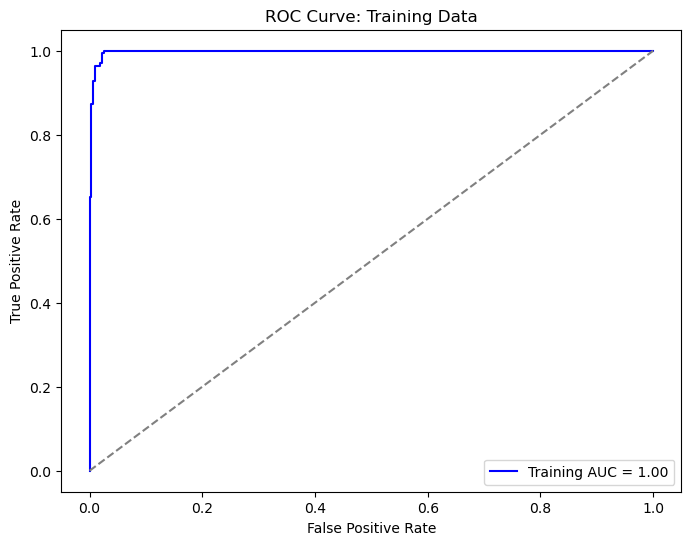

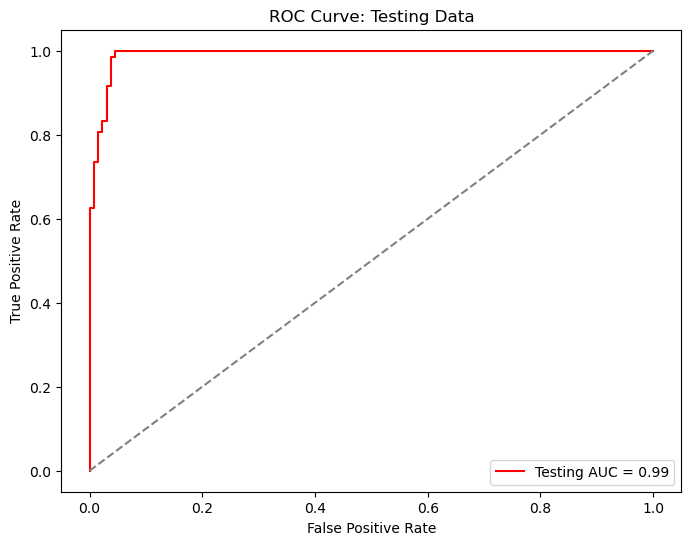


AUC for Training Data: 1.00
AUC for Testing Data: 0.99


In [17]:
# Import necessary libraries for ROC curve and AUC
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# For training data
fpr_train, tpr_train, _ = roc_curve(y_train, pipeline.predict_proba(X_train)[:, 1])
roc_auc_train = auc(fpr_train, tpr_train)

# For testing data
fpr_test, tpr_test, _ = roc_curve(y_test, pipeline.predict_proba(X_test)[:, 1])
roc_auc_test = auc(fpr_test, tpr_test)

# Plot ROC curve for Training data
plt.figure(figsize=(8, 6))
plt.plot(fpr_train, tpr_train, color='blue', label=f'Training AUC = {roc_auc_train:.2f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Random classifier line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve: Training Data')
plt.legend(loc='lower right')
plt.show()

# Plot ROC curve for Testing data
plt.figure(figsize=(8, 6))
plt.plot(fpr_test, tpr_test, color='red', label=f'Testing AUC = {roc_auc_test:.2f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Random classifier line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve: Testing Data')
plt.legend(loc='lower right')
plt.show()

# Display the AUC values for both datasets
print(f"\nAUC for Training Data: {roc_auc_train:.2f}")
print(f"AUC for Testing Data: {roc_auc_test:.2f}")


# **Guide Questions**

**1. What steps are required to remove the "Sample code number" column?**

dataset = dataset.drop(columns=["SampleCodeNumber"])

This line specifies "SampleCodeNumber" as the column to be dropped and sets the columns parameter to indicate that the operation targets a column rather than a row. The result is reassigned to the dataset variable, ensuring the column is permanently removed.

**2. How can the "Class" values be converted into binary (0 and 1) form in Python?**

This conversion is achieved using the apply() method combined with a lambda function:  

dataset["Diagnosis"] = dataset["Diagnosis"].apply(lambda x: 0 if x == 2 else 1)  
  
Here, the lambda function is applied to each value in the "Diagnosis" column. It maps 2 to 0 (indicating benign cases) and 4 to 1 (indicating malignant cases). By reassigning the modified column back to dataset["Diagnosis"], the original values are replaced with their binary counterparts.

**3. What is the importance of splitting the dataset into training and testing sets?**

Splitting the dataset into training and testing sets is essential to evaluate the performance and generalizability of a machine learning model. The training set is used to train the model, allowing it to learn patterns and relationships from the data. The testing set, on the other hand, serves as unseen data to assess how well the model performs on new, real-world data. Without this split, there is a risk of overfitting, where the model memorizes the training data rather than generalizing from it, leading to poor performance on new data.

**4. Why is it necessary to use the stratify parameter in the train_test_split function?**

The stratify parameter in the train_test_split function ensures that the class distribution in the training and testing sets matches the original dataset. This is particularly important for imbalanced datasets, where one class may have significantly more samples than the other. By using stratify, the model is trained and tested on data that reflects the true class proportions, preventing bias in predictions and ensuring a more robust evaluation.

**5. What is logistic regression, and why is it suitable for this dataset?**

Logistic regression is a statistical method used for binary classification tasks. It models the probability of a dependent variable belonging to a particular class based on one or more independent variables. The method uses the logistic function to predict probabilities and a threshold to assign class labels.  
  
This dataset is suitable for logistic regression because the target variable, "Diagnosis (Class)," is binary (benign or malignant). Logistic regression can effectively handle this type of problem by modeling the relationship between the features and the probability of the target being in a specific class. Additionally, it is computationally efficient and interpretable, making it an excellent choice for this dataset.

**6. How can the training and testing accuracy of the logistic regression model be calculated?**

The training and testing accuracy of a logistic regression model can be calculated using the score() method provided by the scikit-learn library. The score() method computes the accuracy as the proportion of correctly classified instances. In the code:  
  
train_accuracy = model.score(X_train, y_train)
test_accuracy = model.score(X_test, y_test)  
  
Here, X_train and y_train are the training features and labels, while X_test and y_test are their testing counterparts.


**7. Which features in the dataset are most influential in determining the tumor status, and how can**

In [21]:
display(feature_importance)

,Feature,Importance
5,BareNuclei,1.849199
0,ClumpThickness,1.198459
8,Mitoses,0.889682
2,CellShapeUniformity,0.877177
1,CellSizeUniformity,0.736751
3,MarginalAdhesion,0.676237
7,NormalNucleoli,0.494755
6,BlandChromatin,0.440015
4,SingleEpithelialCellSize,0.382828


The key features in predicting tumor status are Bare Nuclei, Clump Thickness, and Mitoses. These features have the highest importance scores, indicating that they play a significant role in the model's determination of whether a tumor is benign or malignant.

Feature importance can be evaluated by examining the coefficients of the trained logistic regression model. These coefficients reflect the extent to which each feature influences the likelihood of a tumor being malignant. Larger coefficients suggest that the feature has a more substantial effect on the model’s prediction.

**8. How is a confusion matrix generated, and what does it represent?**

A confusion matrix is generated by comparing the predicted labels with the actual labels. In scikit-learn, it can be created using the confusion_matrix() function:  
  
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)  


The confusion matrix is a table with four entries:
* True Positives (TP): Correctly predicted positive cases.
* True Negatives (TN): Correctly predicted negative cases.
* False Positives (FP): Incorrectly predicted positive cases.
* False Negatives (FN): Incorrectly predicted negative cases.

It represents the performance of a classification model by detailing how many instances are correctly or incorrectly classified for each class.

**9. How are precision, recall, F1-score, and false alarm rate calculated from the confusion matrix?**

Precision: The proportion of true positive predictions out of all positive predictions.

* Precision = $\frac{TP}{TP+FP}$

Recall (Sensitivity): The proportion of true positive predictions out of all actual positives.

* Recall = $\frac{TP}{TP+FN}$

F1-Score: The harmonic mean of precision and recall.

* F1-Score = $2 \frac{(Precision)(Recall)}{Precision+Recall}$

False Alarm Rate: The proportion of false positive predictions out of all actual negatives.

* False Alarm Rate = $\frac{TP}{TP+FP}$

These metrics can be calculated programmatically using scikit-learn’s classification_report() or manually using the confusion matrix values.

**10. Why are these metrics important for evaluating the performance of a classifier?**

These metrics provide a comprehensive evaluation of a classifier's performance:

* Precision is critical in applications where false positives are costly.
* Recall is important in scenarios where false negatives are unacceptable.
* F1-Score balances precision and recall, offering a single metric for comparison.
* False Alarm Rate is essential in understanding the model's propensity to incorrectly predict positive cases.  

Together, these metrics help assess a model’s strengths and weaknesses, ensuring its suitability for the specific problem and dataset.

**11. What is an ROC curve, and how is it plotted for a logistic regression model?**

An ROC (Receiver Operating Characteristic) curve illustrates the trade-off between the true positive rate (sensitivity) and the false positive rate at various threshold settings. It helps evaluate the classifier's ability to distinguish between classes. For a logistic regression model, the ROC curve is plotted using predicted probabilities instead of class labels. In Python, this can be done using scikit-learn's roc_curve function:

from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

Here, y_prob represents the predicted probabilities for the positive class. The curve is then plotted with fpr (false positive rate) on the x-axis and tpr (true positive rate) on the y-axis.

**12. How is the AUC (Area Under the Curve) calculated, and what does it signify about the model's performance?**

The AUC (Area Under the Curve) is calculated as the integral of the ROC curve. It represents the likelihood that the model ranks a randomly chosen positive instance higher than a randomly chosen negative instance. In Python, it can be computed using:

from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, y_prob)

An AUC of 1 indicates perfect classification, while an AUC of 0.5 suggests the model performs no better than random guessing. Higher AUC values signify better model performance.

**13. How do the training and testing ROC curves compare, and what insights can be derived from this comparison?**

The training and testing ROC curves can be compared by plotting them together. If the curves are similar and close to the top-left corner, the model generalizes well. However, if the training curve is significantly higher than the testing curve, it may indicate overfitting, where the model performs well on the training data but poorly on unseen data. A smaller gap between the two curves suggests the model has good generalization capability.

**14. What challenges did you encounter during the preprocessing or model training phases, and how did you address them?**

One of the challenges was that the dataset from the provided link in the PDF differed from the expected one, with variations in features. Additionally, handling NaN values posed an issue, as an initial attempt to drop rows removed all data. Adjustments in the preprocessing code resolved this problem. Another challenge was the imbalance in the target classes, which was addressed using the stratify parameter in the train_test_split function, as also indicated in the guidelines.

**15. If the model's performance is not satisfactory, what adjustments could be made to improve it?**

To improve the model’s performance, simple fixes can be applied:  

1. Review Preprocessing Steps: Ensure that data cleaning and feature scaling are done correctly.
2. Hyperparameter Adjustment: Slightly tweak the regularization strength to balance bias and variance.
3. Address Class Imbalance: Use stratified sampling or oversample the minority class to ensure fair representation during training.


# **Conclusion**